# Лабораторная работа №6

Вариант 8

## Цель работы

- изучение принципов построения модели линейной одномерной регрессии.

## Задачи 

 - реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
 - получение теоретических представлений о задаче регресии;
 - получение навыков использования пайплайна при решении задачи машинного обучения;
  получение навыков рефакторинга кода в задачах машинного обучения.

Загрузим и подготовим данные

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [3]:
# Загрузка данных
url = 'dataset/lowest_ranked_movies_data.csv'
dataset = pd.read_csv(url)

# Показать первые строки данных
dataset.head()

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94K,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P..."
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37K,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']"
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25K,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']"
3,4,Superbabies: Baby Geniuses 2,2004,PG,1h 28m,1.5,32K,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']"
4,5,The Hottie & the Nottie,2008,PG-13,1h 31m,2.0,39K,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin..."


In [6]:
# Создание столбца 'IsBottom100' на основе условия
threshold_rating = 2.5
dataset['IsBottom100'] = np.where(dataset['rating'] < threshold_rating, 1, 0)

dataset.head()

,rank,name,year,certification,duration,rating,review_count,director,writer,genre,stars,IsBottom100
0,1,Disaster Movie,2008,PG-13,1h 27m,1.9,94K,"['Jason Friedberg', 'Aaron Seltzer']","['Jason Friedberg', 'Aaron Seltzer']","['Comedy', 'Sci-Fi']","['Carmen Electra', 'Vanessa Lachey', 'Nicole P...",1
1,2,Manos: The Hands of Fate,1966,Not Rated,1h 10m,1.6,37K,['Harold P. Warren'],['Harold P. Warren'],['Horror'],"['Tom Neyman', 'John Reynolds', 'Diane Adelson']",1
2,3,Birdemic: Shock and Terror,2010,Not Rated,1h 45m,1.7,25K,['James Nguyen'],"['Writer', 'James Nguyen', '']","['Horror', 'Thriller']","['Alan Bagh', 'Whitney Moore', 'Tippi Hedren']",1
3,4,Superbabies: Baby Geniuses 2,2004,PG,1h 28m,1.5,32K,['Bob Clark'],"['Writers', 'Robert Grasmere', 'Francisca Mato...","['Comedy', 'Family', 'Sci-Fi']","['Jon Voight', 'Scott Baio', 'Vanessa Angel']",1
4,5,The Hottie & the Nottie,2008,PG-13,1h 31m,2.0,39K,['Tom Putnam'],['Heidi Ferrer'],"['Comedy', 'Romance']","['Paris Hilton', 'Joel David Moore', 'Christin...",1


In [9]:
# Разделение на матрицу признаков и зависимую переменную
X = dataset[['rating']]
y = dataset['IsBottom100']

# Показать первые строки матрицы признаков
X.head()


,rating
0,1.9
1,1.6
2,1.7
3,1.5
4,2.0


In [10]:
# Показать первые строки зависимой переменной
y.head()

0    1
1    1
2    1
3    1
4    1
Name: IsBottom100, dtype: int32

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Создание пайплайна
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Обработка пропущенных значений
    ('scaler', StandardScaler()),  # Масштабирование признаков
    ('classifier', LogisticRegression())  # Линейная модель регрессии
])

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Обучение пайплайна
pipeline.fit(X_train, y_train)

# Оценка точности модели на тестовом наборе
accuracy = pipeline.score(X_test, y_test)
print(f'Точность модели: {accuracy}')


Точность модели: 0.96


In [41]:
# Обработка пропущенных значений
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X_train)  # используем только тренировочные данные для обучения
X_train_without_nan = imputer.transform(X_train)
X_test_without_nan = imputer.transform(X_test)

# Проверим, что нет пропущенных значений в тренировочном наборе
print(np.isnan(X_train_without_nan).sum())

# Теперь можем продолжить обучение пайплайна с обработанными данными
pipeline.fit(X_train_without_nan, y_train)

# Оценка точности модели на тестовом наборе
accuracy = pipeline.score(X_test_without_nan, y_test)
print(f'Точность модели: {accuracy}')

0
Точность модели: 0.96


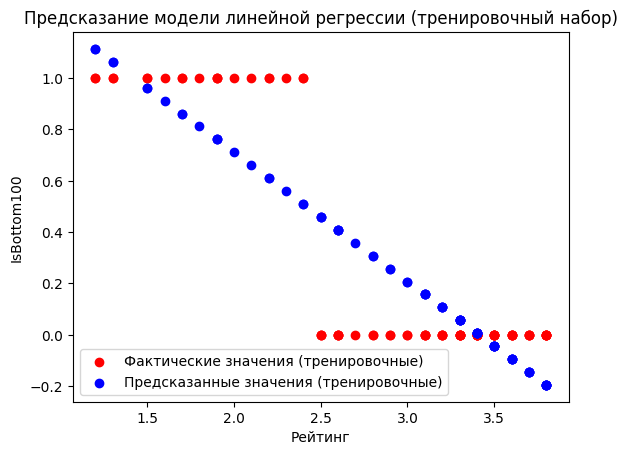

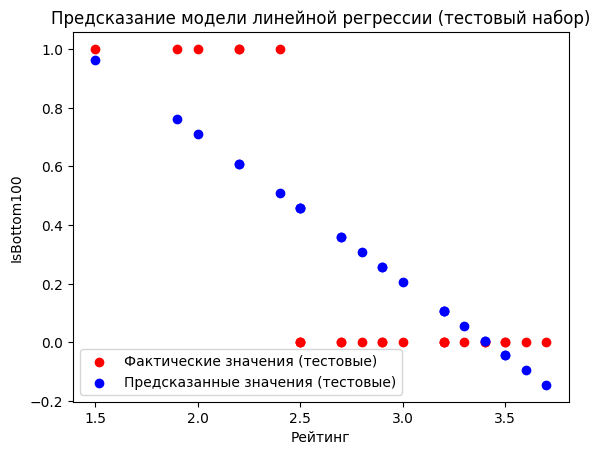

In [44]:
# Обучение линейной модели регрессии
regressor.fit(X_train, y_train)

# Визуализация результатов на тренировочном наборе данных
plt.scatter(X_train, y_train, color='red', label='Фактические значения (тренировочные)')
plt.scatter(X_train, regressor.predict(X_train), color='blue', label='Предсказанные значения (тренировочные)')
plt.title('Предсказание модели линейной регрессии (тренировочный набор)')
plt.xlabel('Рейтинг')
plt.ylabel('IsBottom100')
plt.legend()
plt.show()

# Визуализация результатов на тестовом наборе данных
plt.scatter(X_test, y_test, color='red', label='Фактические значения (тестовые)')
plt.scatter(X_test, regressor.predict(X_test), color='blue', label='Предсказанные значения (тестовые)')
plt.title('Предсказание модели линейной регрессии (тестовый набор)')
plt.xlabel('Рейтинг')
plt.ylabel('IsBottom100')
plt.legend()
plt.show()


In [46]:
# Использование модели для предсказания
rating_to_predict = 1.8
predicted_label = regressor.predict([[rating_to_predict]])

# Вывод результата
print(f'Предсказание для фильма с рейтингом {rating_to_predict}: {predicted_label[0]}')

Предсказание для фильма с рейтингом 1.8: 0.8106114894969373


C:\Users\Egor Davydov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Контрольные вопросы

1. Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?
- Ответ: При линейной регрессии коэффициенты модели относятся к признакам в соответствии с их весом. Масштабирование не влияет на отношения между признаками, поэтому оно необязательно. Масштабирование может быть полезным для методов, основанных на расстоянии, но для линейной регрессии это не является обязательным.
2. Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?
- Ответ: Использование квадратичного отклонения обусловлено методом наименьших квадратов (МНК), который минимизирует сумму квадратов разностей между прогнозами и фактическими значениями. Это обеспечивает математическую простоту и хорошие статистические свойства решения.
3. Что именно реализовано в методе fit(X, y) класса LinearRegression?
- Ответ: Метод fit(X, y) класса LinearRegression реализует процесс обучения модели. В нем выполняется поиск оптимальных параметров модели (весов) с использованием обучающих данных X и соответствующих целевых значений y.
4. Поясните назначение метода predict класса LinearRegression.
- Ответ: Метод predict используется для предсказания целевых значений на основе обученной модели. После того, как модель обучена методом fit, predict позволяет получить предсказания для новых данных.
5. По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?
- Ответ: Оценка точности модели должна производиться на тестовой подвыборке. Тестовая подвыборка предоставляет независимую оценку производительности модели на данных, которые она ранее не видела. Это помогает определить, насколько хорошо модель обобщает знания на новых данных.
